In [1]:
import os
import random
import skimage.data
import skimage.transform
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Allow image embeding in notebook
%matplotlib inline

In [2]:
def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".jpg")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels


# Load training and testing datasets.
#ROOT_PATH = "/traffic"
train_data_dir = os.path.join( r'C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset Main\crop_dataset\crop_dataset')
test_data_dir = os.path.join( r'C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset Main\test_data\test_data')

images, labels = load_data(train_data_dir)

In [3]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))


Unique Labels: 43
Total Images: 26640


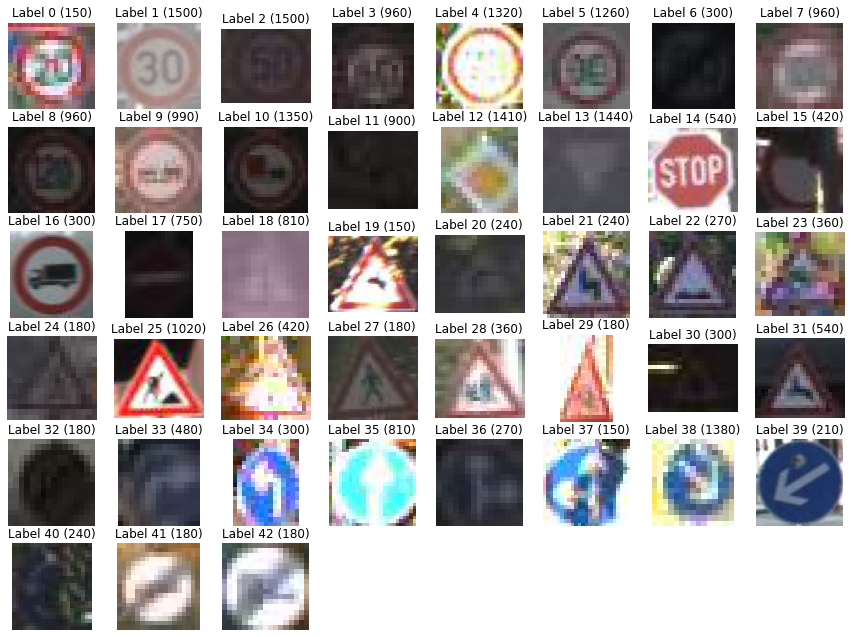

In [4]:
def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_and_labels(images, labels)

In [5]:
import numpy as np
import cv2

def denoise_images(images):
    denoised_images = []
    for image in images:
        # Gri ölçekli görüntüyü elde et
        #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Medyan bulanıklaştırma filtresini uygula
        denoised_image = cv2.medianBlur(image, 5)
        denoised_images.append(denoised_image)
    return denoised_images

# Gürültüyü temizle
denoised_images = denoise_images(images)


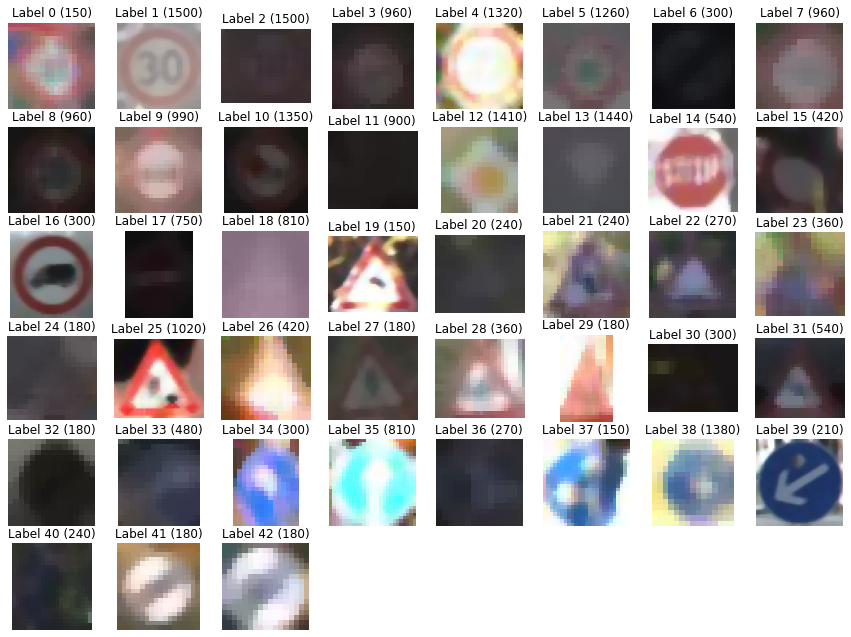

In [6]:
display_images_and_labels(denoised_images, labels)

In [7]:

def denoise_images(images):
    denoised_images = []
    for image in images:
        # Gaussian bulanıklaştırma uygula
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
        denoised_images.append(denoised_image)
    return denoised_images

# images değişkeniniz mevcut olduğunu varsayarak
denoised_images2 = denoise_images(images)


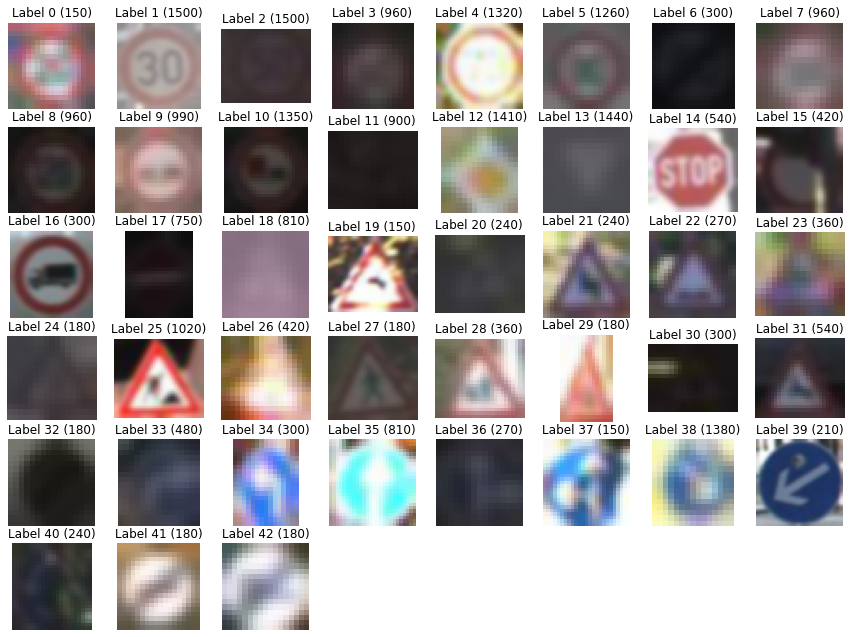

In [8]:
display_images_and_labels(denoised_images2, labels)

In [9]:
import numpy as np

def normalize_images(images):
    normalized_images = []
    for image in images:
        # Görüntüyü normalleştir
        normalized_image = image / 255.0  # Görüntüyü [0, 1] aralığına getir
        normalized_images.append(normalized_image)
    return normalized_images

# images değişkeniniz mevcut olduğunu varsayarak
normalized_images = normalize_images(images)


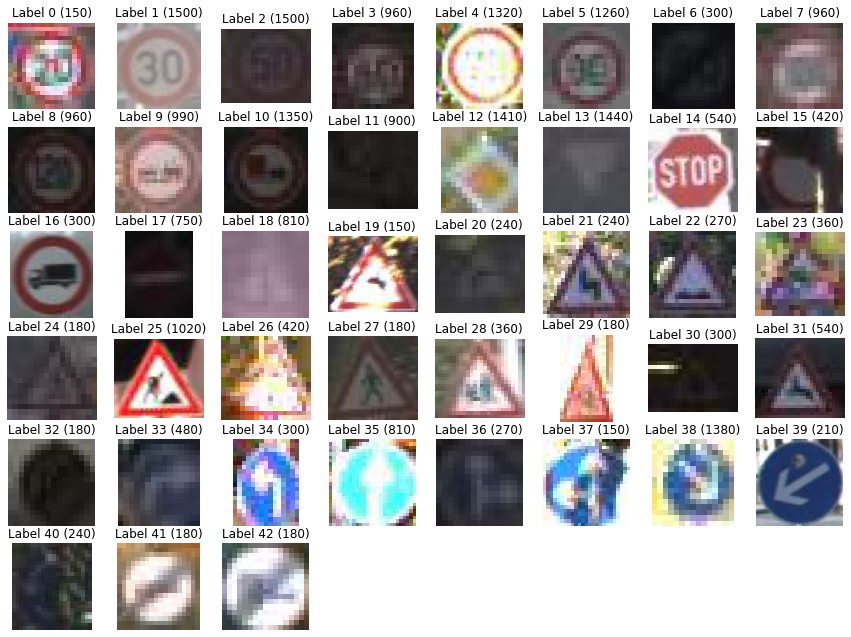

In [10]:
display_images_and_labels(normalized_images, labels)

In [11]:
def normalize_imagess(images):
    normalized_images = []
    for image in images:
        # Görüntüyü normalleştir
        normalized_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        normalized_images.append(normalized_image)
    return normalized_images

# Örnek olarak, images değişkeninizin mevcut olduğunu varsayalım
# İlk olarak görüntüleri normalize edin
normalized_imagess = normalize_imagess(images)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

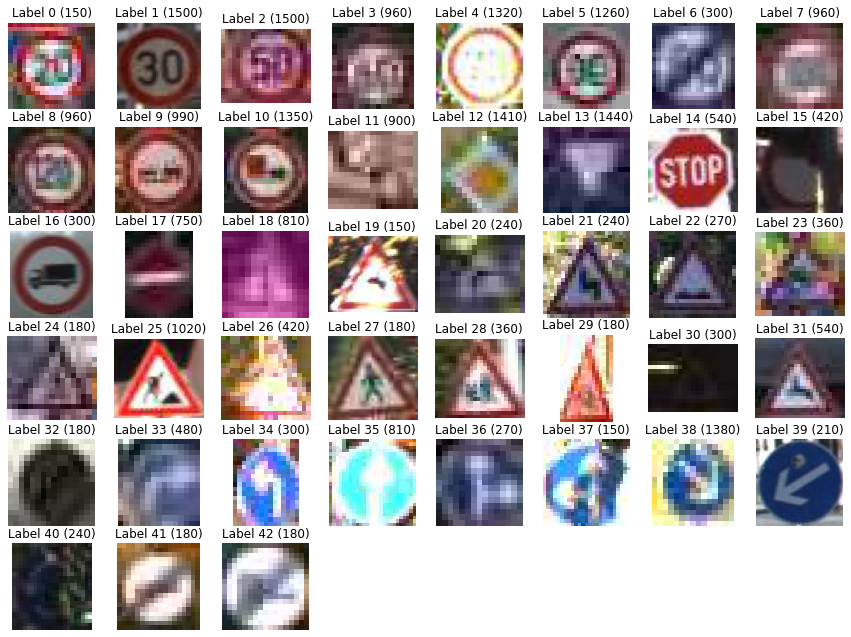

In [12]:
display_images_and_labels(normalized_imagess, labels)

In [13]:

def denoise_imagess(normalized_imagess):
    denoised_images = []
    for image in normalized_imagess:
        # Gri ölçekli görüntüyü elde et
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Medyan bulanıklaştırma filtresini uygula
        denoised_image = cv2.medianBlur(gray, 5)
        denoised_images.append(denoised_image)
    return denoised_images

# Gürültüyü temizle
denoised_images3 = denoise_imagess(normalized_imagess)



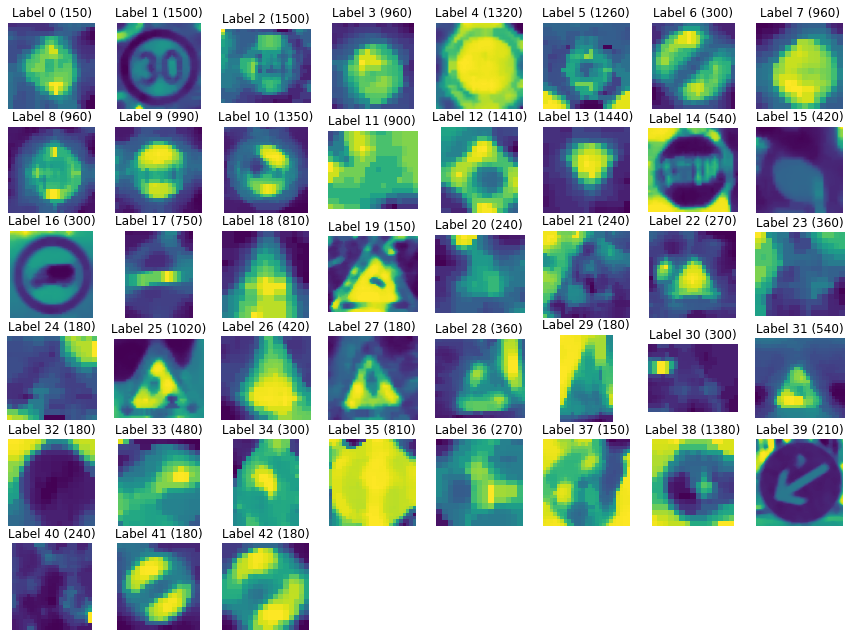

In [14]:
display_images_and_labels(denoised_images3, labels)

In [15]:

def denoise_images3(normalized_imagess):
    denoised_images = []
    for image in normalized_imagess:
        # Gri ölçekli görüntüyü elde et
        #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Medyan bulanıklaştırma filtresini uygula
        denoised_image = cv2.medianBlur(image, 5)
        denoised_images.append(denoised_image)
    return denoised_images

# Gürültüyü temizle
denoised_images4 = denoise_images3(normalized_imagess)



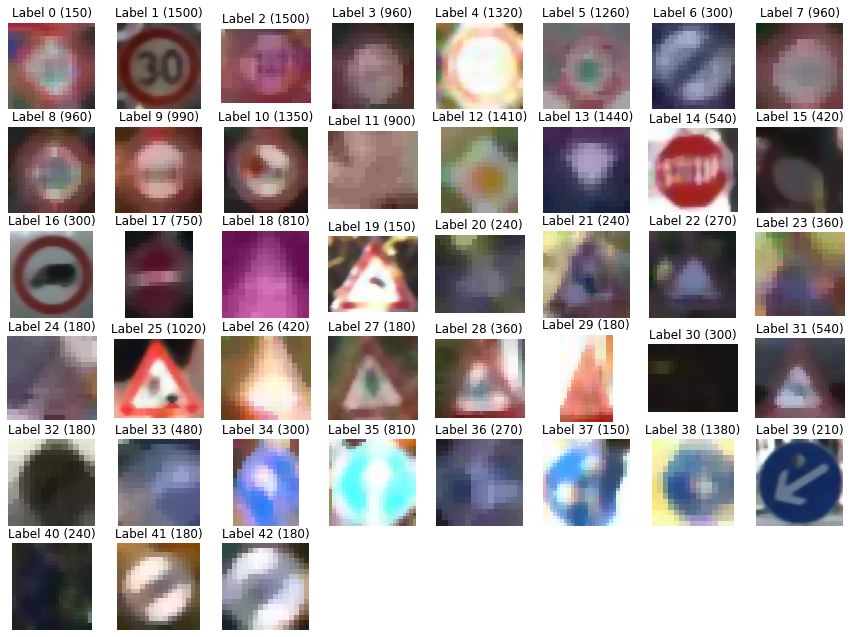

In [16]:
display_images_and_labels(denoised_images4, labels)